# Importing the Dataset

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')    

In [158]:
df=pd.read_csv('Insurance_claims.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Checking Null Values

In [159]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We can see that the column _c39 is having null values for the entire rows.

In [160]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# DataFrame Description

In this data we have the columns with the information about the customer insurance details  and various range it covers as a policy.The dataset includes details about the details of the accident on the basis of which the claims have been made. 
The columns like property_claim,vehicle_claim, tells about fraud claims.
We will be creating  a predictive model that predicts if an insurance claim is fraudulent or not.

# Exploratory Data Analysis

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Since the column _c39 is  having missed values in the entire column,we are going to drop that column,because we dont know what data the column holds about.

In [162]:
# Dropping columns 
df.drop('_c39',axis=1,inplace=True)

In [163]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Now there is no missing values in the entire dataset.

# Checking the datatypes of the columns

In [164]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# Statistical Analysis

In [165]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


looking at the statistical analysis the dataset is normally distributed

# Data Visualization

<AxesSubplot:>

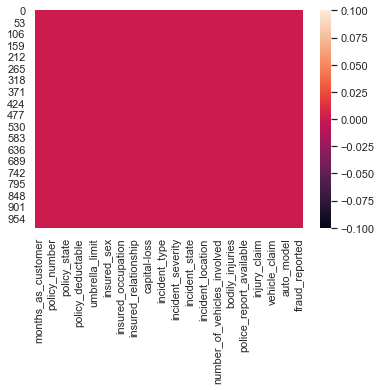

In [166]:
sns.heatmap(df.isnull())

# Data Preprocessing

In [168]:
le = LabelEncoder()
le_count = 0
for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:          
            df[col] = le.fit_transform(df[col].astype(str))          
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [169]:
df


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,0
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,0
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,0


we have encoded our target prediction column fraud_reported .

# Correlation

<AxesSubplot:>

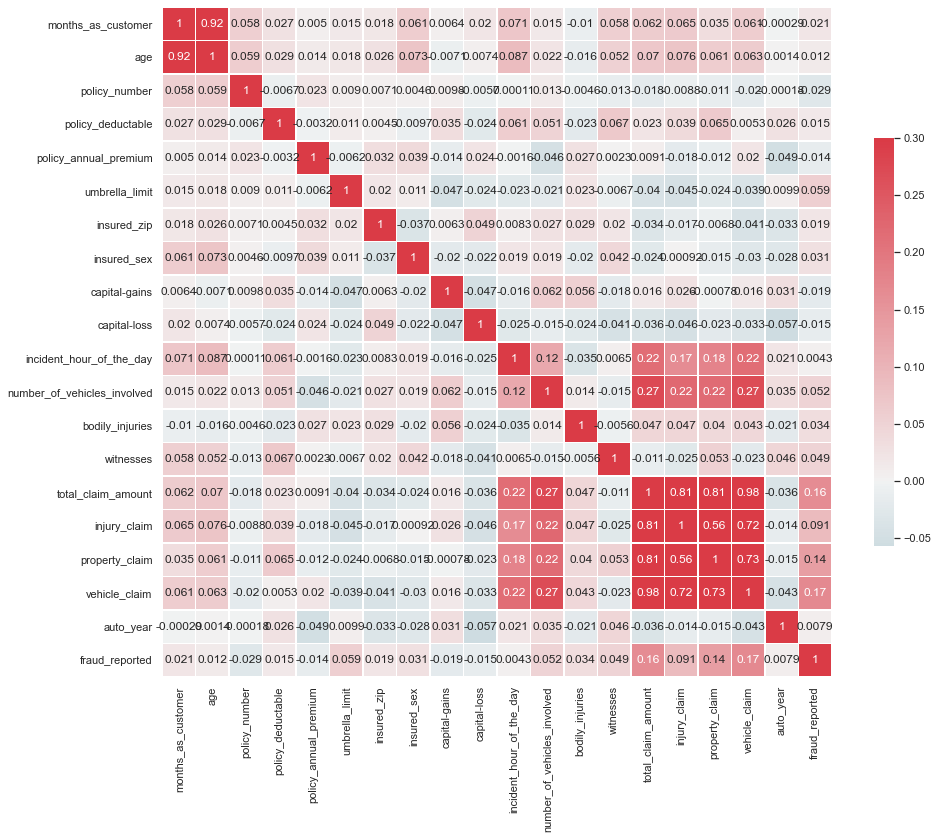

In [170]:
sns.set(style="white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

we can see there is high correlation between the columns total_claim_amount,injury_claim,property_claim,vechile claim has high correlation .

# converting the data types and unique values.


In [171]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
14,incident_location,1000
0,policy_bind_date,951
7,incident_date,60
18,auto_model,39
5,insured_hobbies,20
4,insured_occupation,14
17,auto_make,14
3,insured_education_level,7
12,incident_state,7
13,incident_city,7


In [172]:
# droping columns based on above result
df.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

# Data Visulaization


we are checking for the insured_hobbies and plotting with fraud_reported .

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

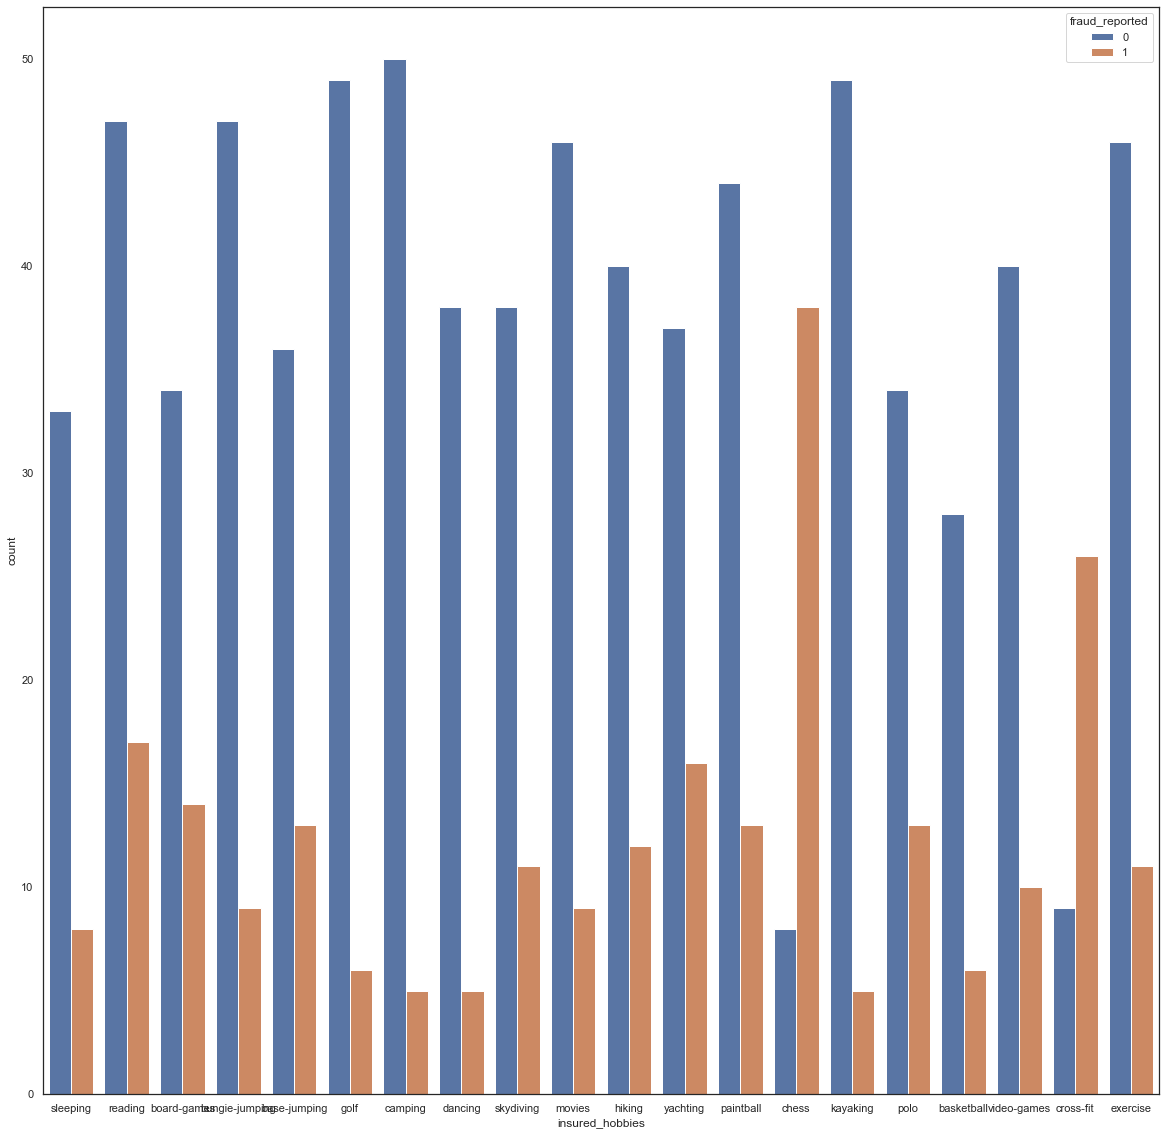

In [173]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

In [174]:
df['insured_hobbies']=df['insured_hobbies'].apply(lambda x :'Other' if x!='chess' and x!='cross-fit' else x)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

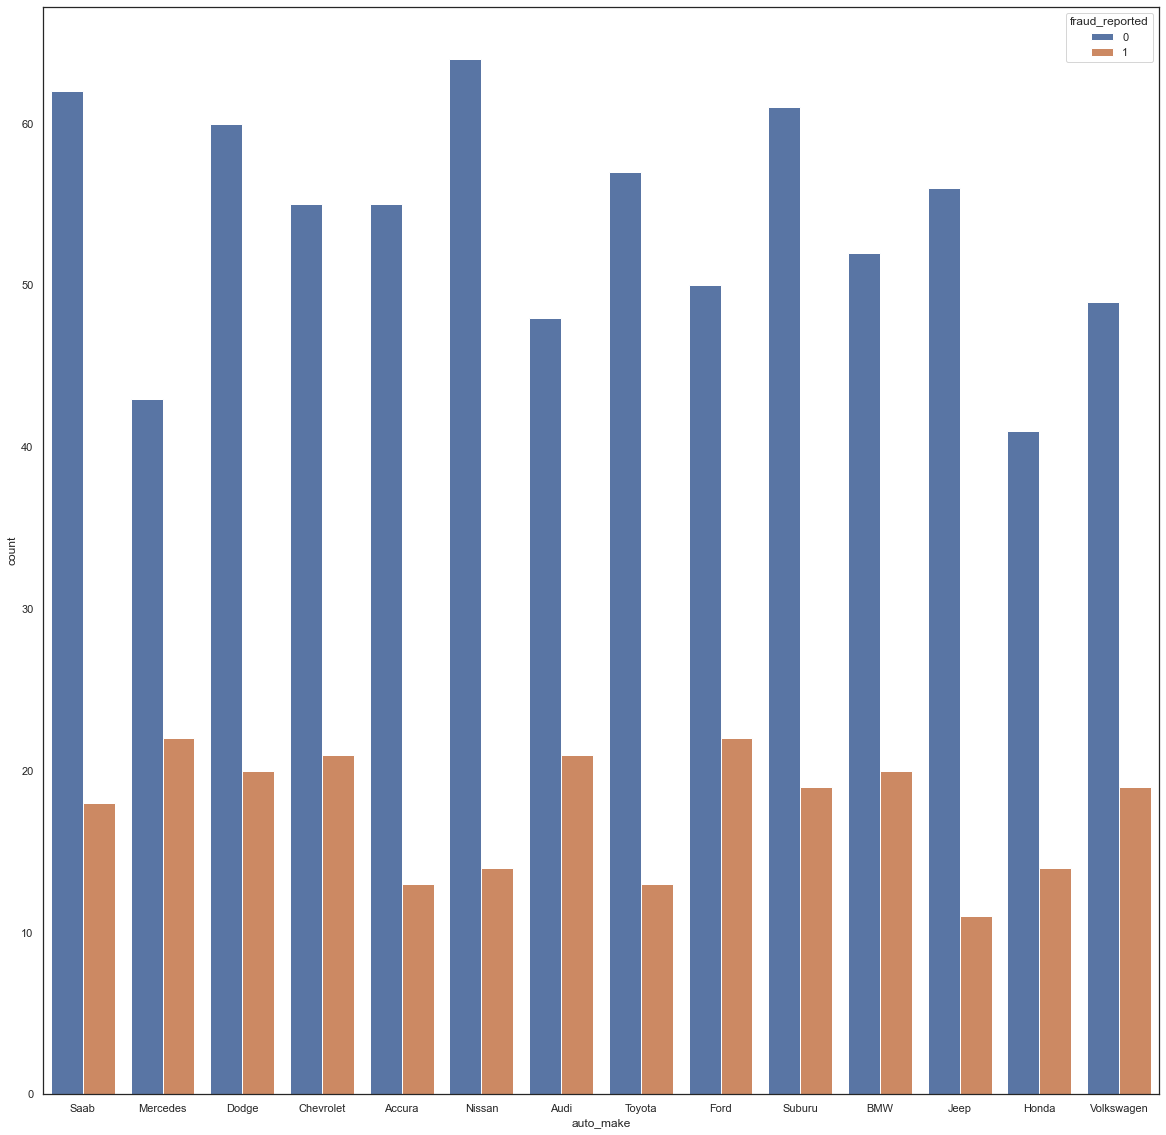

In [175]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

In [176]:
df['insured_hobbies'].unique()

array(['Other', 'chess', 'cross-fit'], dtype=object)

In [177]:
df = pd.get_dummies(df)
print('Training Features shape: ', df.shape)

Training Features shape:  (1000, 92)


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

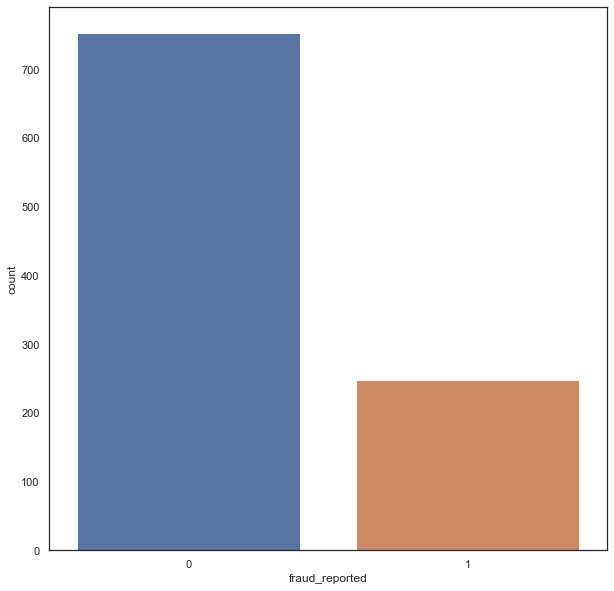

In [178]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='fraud_reported',data=df)

In [179]:
y=df['fraud_reported']
x= df.drop('fraud_reported',axis=1)

In [181]:
x.shape

(1000, 91)

In [182]:
y.shape

(1000,)

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [184]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


# Decision Tree Classifier

In [185]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7866666666666666
[[202  28]
 [ 36  34]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       230
           1       0.55      0.49      0.52        70

    accuracy                           0.79       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.78      0.79      0.78       300



# GaussianNB

In [186]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.69
[[188  42]
 [ 51  19]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       230
           1       0.31      0.27      0.29        70

    accuracy                           0.69       300
   macro avg       0.55      0.54      0.55       300
weighted avg       0.68      0.69      0.68       300



# kneighbors Classifier

In [187]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6866666666666666
[[197  33]
 [ 61   9]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       230
           1       0.21      0.13      0.16        70

    accuracy                           0.69       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.64      0.69      0.66       300



In [188]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7666666666666667
[[230   0]
 [ 70   0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       230
           1       0.00      0.00      0.00        70

    accuracy                           0.77       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.59      0.77      0.67       300



In [189]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7666666666666667
[[230   0]
 [ 70   0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       230
           1       0.00      0.00      0.00        70

    accuracy                           0.77       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.59      0.77      0.67       300



# Ensemble Techniques-Random Forest Classifier

In [190]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [191]:
forest.score(x_train,y_train)

0.98

# Confusion Matrix

In [192]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,forest.predict(x_test))
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(cm)
print('Model Testing Accuracy={}'.format((TP+TN)/(TP+TN+FN+FP)))

[[218  12]
 [ 36  34]]
Model Testing Accuracy=0.84


<AxesSubplot:>

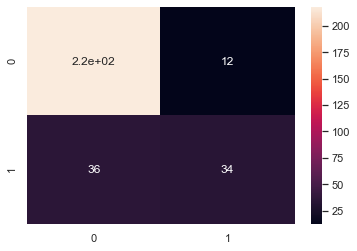

In [220]:
sns.heatmap(cm,annot=True)

In [222]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier()]
predm=DecisionTreeClassifier()
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predem=m.predict(x_test)
    print('Accuracy score of',m,'is')
    print(accuracy_score(y_test,predem))
    print(confusion_matrix(y_test,predem))
    print(classification_report(y_test,predem))
    print('\n')

Accuracy score of DecisionTreeClassifier() is
0.7766666666666666
[[199  31]
 [ 36  34]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       230
           1       0.52      0.49      0.50        70

    accuracy                           0.78       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.77      0.78      0.77       300



Accuracy score of SVC() is
0.7666666666666667
[[230   0]
 [ 70   0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       230
           1       0.00      0.00      0.00        70

    accuracy                           0.77       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.59      0.77      0.67       300



Accuracy score of KNeighborsClassifier() is
0.6866666666666666
[[197  33]
 [ 61   9]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81 

# Cross Validation

In [219]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
gnbscores = cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(), gnbscores.std())

[0.735 0.645 0.525 0.73  0.72 ]
0.6709999999999999 0.07996249120681519


In [194]:
svcscores = cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.75  0.75  0.755 0.755 0.755]
0.7529999999999999 0.00244948974278318


In [195]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.745 0.795 0.735 0.735 0.815]
0.7649999999999999 0.03346640106136302


# Hyper Parameter Tuning

In [196]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [197]:
from sklearn import svm, datasets

from sklearn.model_selection import GridSearchCV
iris=datasets.load_iris()
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

clf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [198]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [199]:
sv=svm.SVC(kernel='poly',C=1)
sv.fit(x,y)
t=sv.score(x,y)
print(round(t,2))

0.75


In [200]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier()


grid_param={'criterion':['gini','entropy']
           }

#gridk={'kernel':['linear','rbf','poly']}

gd_sr=GridSearchCV(estimator=dtc,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x_test,y_test)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'criterion': 'entropy'}
0.82


# AUC ROC CURVE

In [201]:
from  sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [232]:
y_pred_prob=knn.predict_proba(x_test)[:,1]

In [203]:
y_pred_prob

array([0.2, 0. , 0.4, 0.2, 0.2, 0. , 0.4, 0.2, 0.4, 0. , 0.2, 0.4, 0.2,
       0.8, 0.6, 0.4, 0.4, 0.2, 0. , 0.6, 0. , 0.2, 0.8, 0.2, 0. , 0.4,
       0.2, 0.4, 0.4, 0.2, 0. , 0.4, 0.4, 0.4, 0.2, 0. , 0.2, 0.6, 0.2,
       0.4, 0.8, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0. , 0.4, 0.4, 0.2, 0.2,
       0.4, 0.4, 0. , 0.6, 0. , 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0. , 0. ,
       0.6, 0.4, 0.4, 0. , 0.2, 0. , 0.6, 0.4, 0.2, 0.2, 0.4, 0.6, 0. ,
       0.4, 0.2, 0.4, 0.2, 0.4, 0. , 0.4, 0.4, 0. , 0.2, 0. , 0.2, 0. ,
       0.2, 0.4, 0.4, 0.4, 0. , 0.4, 0.8, 0.2, 0.2, 0. , 0.4, 0.2, 0. ,
       0.4, 0.4, 0.2, 0.6, 0. , 0.4, 0.2, 0.4, 0.2, 0.2, 0. , 0.2, 0.6,
       0.4, 0.2, 0.2, 0.6, 0.2, 0.8, 0.2, 0.4, 0.2, 0. , 0.2, 0. , 0.2,
       0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0.6,
       0.8, 0.8, 0.6, 0.8, 0.4, 0.4, 0.6, 0.4, 0.2, 0. , 0.2, 0. , 0.4,
       0.2, 0.2, 0. , 0.2, 0. , 0.6, 0.2, 0.6, 0.6, 0. , 0.6, 0. , 0.4,
       0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.4, 0.8, 0.

In [204]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [205]:
fpr

array([0.        , 0.04347826, 0.14347826, 0.39130435, 0.76521739,
       1.        ])

In [206]:
tpr

array([0.        , 0.        , 0.12857143, 0.37142857, 0.84285714,
       1.        ])

In [207]:
thresholds

array([1.8, 0.8, 0.6, 0.4, 0.2, 0. ])

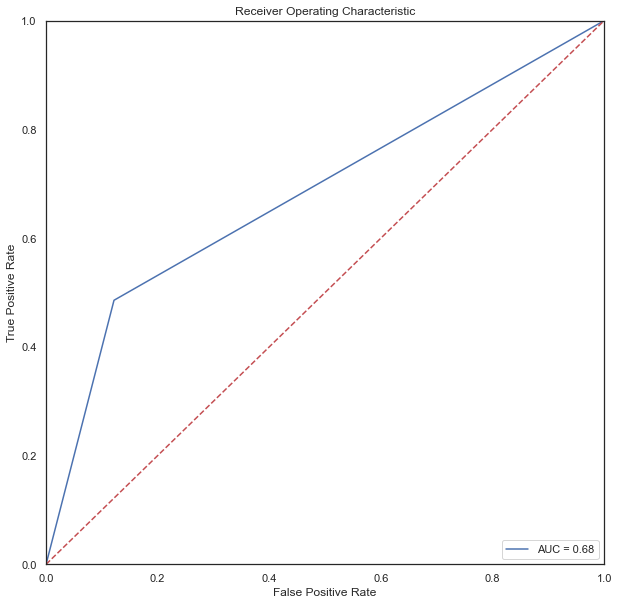

In [229]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,preddtc)
roc_auc = metrics.auc(fpr, tpr)
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [233]:
auc_score=roc_auc_score(y_test,knn.predict(x_test))

In [211]:
print(auc_score)

0.49254658385093164


Usually, the AUC is in the range [0.5,1] because useful classifiers should perform better than random. In principle, however, the AUC can also be smaller than 0.5,

# Saving the best model

# Conclusion

In [224]:
import pickle
with open('model_pickle22','wb') as f:
    pickle.dump(model,f)

In [225]:
with open('model_pickle22','rb') as f:
    lr_prediction=pickle.load(f)

In [226]:
lr_prediction

[DecisionTreeClassifier(),
 SVC(),
 KNeighborsClassifier(),
 GaussianNB(),
 RandomForestClassifier()]